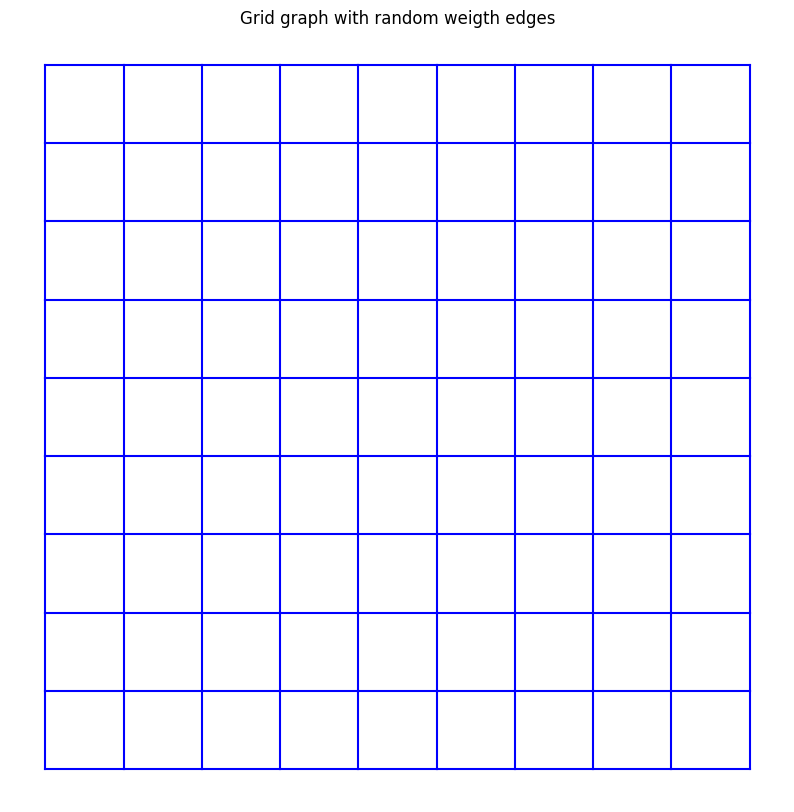

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import matplotlib
import numpy as np
import time
import random

matplotlib.rcParams['figure.figsize'] = [10, 10]

random.seed(1)

def plot_show():
    plt.show()

def plot_set_title(title):
    plt.title(title)

def gen_grid_graph():
    global WIDTH, HEIGHT
    grid_graph = [[] for i in range(2*WIDTH*HEIGHT - WIDTH - HEIGHT)]
    count = 0

    for i in range(WIDTH * HEIGHT):
        idx1 = i + 1
        idx2 = i + WIDTH
        if idx1 // WIDTH != idx1 / WIDTH:
            weight1 = random.randint(0, 10000)
            grid_graph[count] = [i, idx1, weight1]
            count += 1

        if idx2 < WIDTH * HEIGHT:
            weight2 = random.randint(0, 10000)
            grid_graph[count] = [i, idx2, weight2]
            count += 1
    
    return grid_graph

def plot_graph(graph):
    global WIDTH, HEIGHT
    pointsx = []
    pointsy = []
    for edge in graph:
        pointsx.append(edge[0] % WIDTH)
        pointsx.append(edge[1] % WIDTH)
        pointsy.append(edge[0] // WIDTH)
        pointsy.append(edge[1] // WIDTH)

    for i in range(0, len(pointsx), 2):
        plt.plot(pointsx[i:i+2], pointsy[i:i+2], "b-")

    plt.axis('equal')
    plt.axis("off")

WIDTH = 10
HEIGHT = 10
GRID_GRAPH = gen_grid_graph()

plot_graph(GRID_GRAPH)
plot_set_title("Grid graph with random weigth edges")
plot_show()

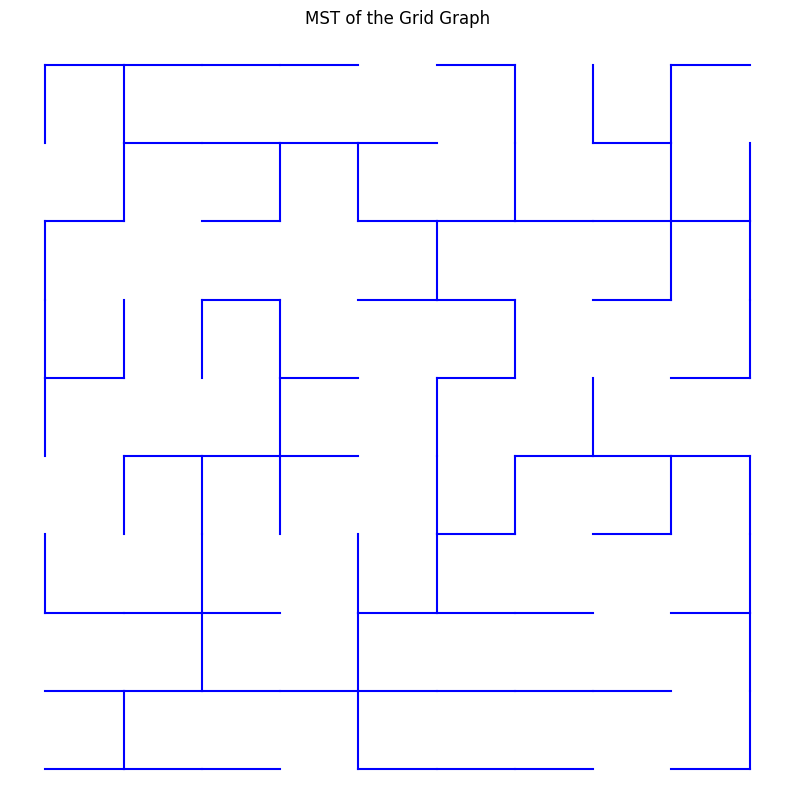

In [2]:
def gen_tree(grid_graph):
    global WIDTH, HEIGHT
        
    parent = [i for i in range(WIDTH * HEIGHT)]
    grid_graph.sort(key=lambda x: x[2])
    tree = []
    count = 0

    for i in range(len(grid_graph)):
        V1 = v1 = grid_graph[i][0]
        V2 = v2 = grid_graph[i][1]

        while v1 != parent[v1]:
            v1 = parent[v1]

        while v2 != parent[v2]:
            v2 = parent[v2]

        if v1 != v2:
            tree.append(grid_graph[i])
            parent[v2] = v1
            count += 1

        if count == HEIGHT * WIDTH - 1:
            break
        
    return tree

TREE = gen_tree(GRID_GRAPH)

plot_graph(TREE)
plot_set_title("MST of the Grid Graph")
plot_show()

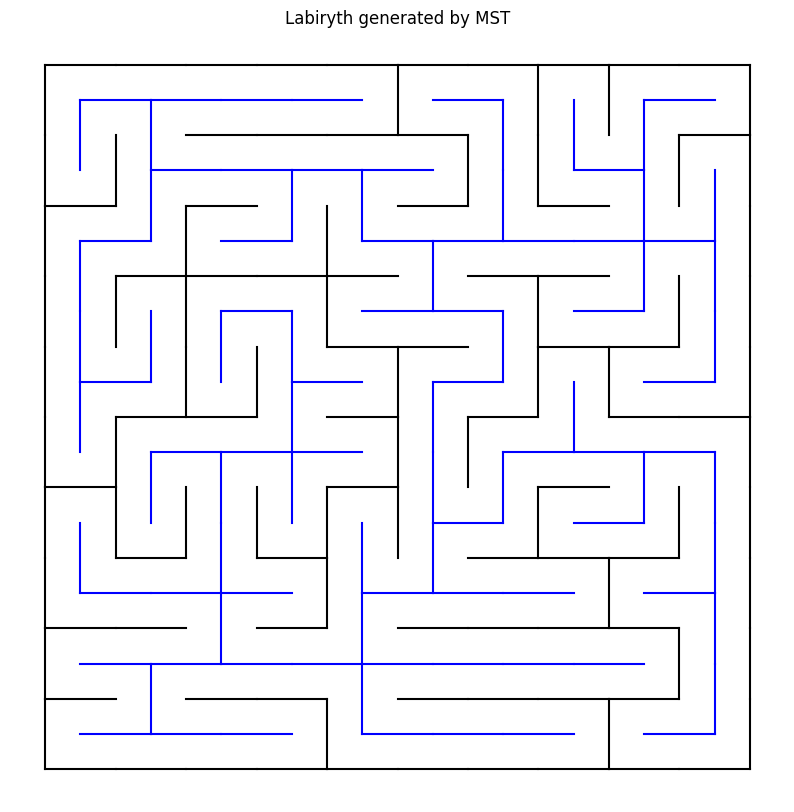

In [3]:
def gen_labirynth(tree):
    global WIDTH, HEIGHT
    labirynth = [12 for i in range(WIDTH * HEIGHT)]

    for i in range(WIDTH):
        labirynth[i] += 2

    for i in range(HEIGHT):
        labirynth[i * WIDTH] += 1

    for edge in tree:
        if edge[1] - edge[0] == 1:
            labirynth[edge[0]] -= 4
        elif edge[1] - edge[0] == WIDTH:
            labirynth[edge[0]] -= 8
    
    return labirynth

def plot_labirynth(labirynth):
    global WIDTH
    map = [[-1, 1, 1, 1], [1, 1, 1, -1], [-1, 1, -1, -1], [-1, -1, 1, -1]]

    offsetx = 0.5
    offsety = 0.5

    pointsx = []
    pointsy = []

    for i in range(len(labirynth)):

        cell_x = i % WIDTH
        cell_y = i // WIDTH
        cell_val = labirynth[i]
        expo = 3

        while cell_val > 0:
            if cell_val >= 2 ** expo:
                pointsx.append(cell_x + map[3 - expo][0] * offsetx)
                pointsx.append(cell_x + map[3 - expo][1] * offsetx)
                pointsy.append(cell_y + map[3 - expo][2] * offsety)
                pointsy.append(cell_y + map[3 - expo][3] * offsety)
                cell_val -= 2 ** expo
            expo -= 1
            
    plt.axis('equal')
    for i in range(0, len(pointsx), 2):
        plt.plot(pointsx[i:i+2], pointsy[i:i+2], color="black")

LABIRYNTH = gen_labirynth(TREE)

plot_labirynth(LABIRYNTH)
plot_graph(TREE)
plot_set_title("Labiryth generated by MST")
plot_show()



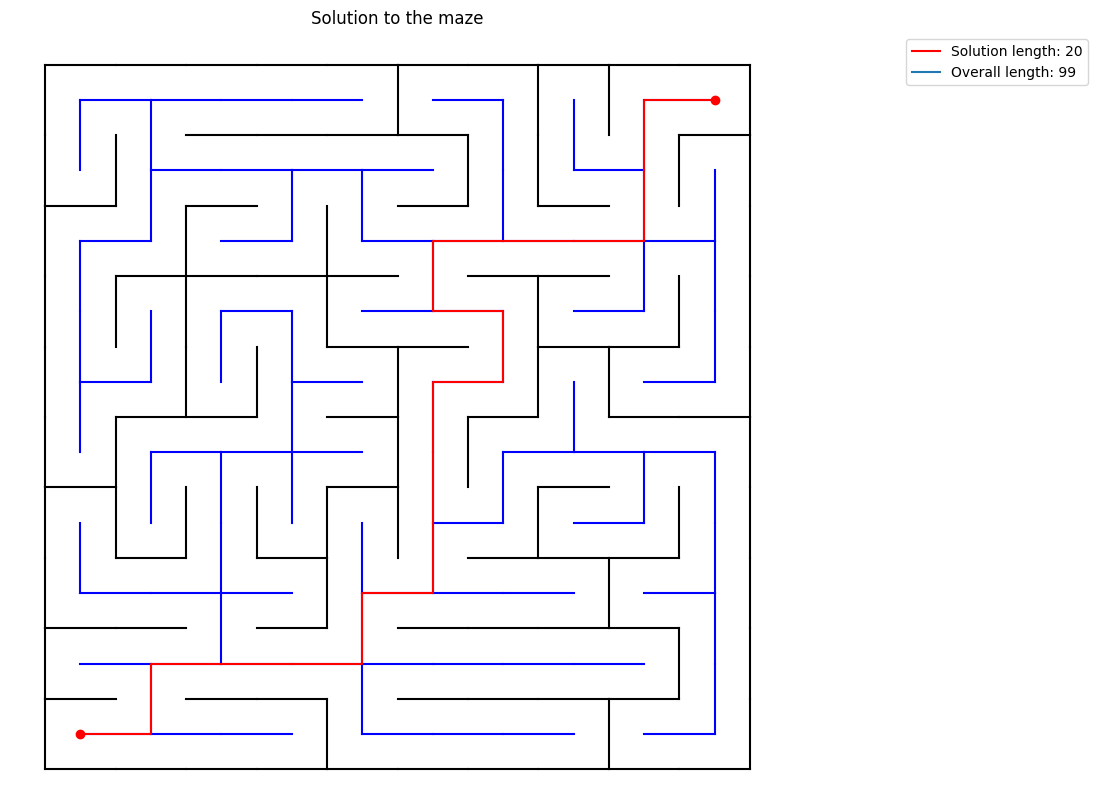

In [4]:
from asyncio.windows_utils import BUFSIZE
from cProfile import label

def bidirectional_BFS_search(tree):
    global WIDTH, HEIGHT

    start_parent = [i for i in range(WIDTH * HEIGHT)]
    end_parent = [i for i in range(WIDTH * HEIGHT)]
    start_visited = [False for i in range(WIDTH * HEIGHT)]
    end_visited = [False for i in range(WIDTH * HEIGHT)]
    path = []

    start_ = start = 0
    end_ = end = WIDTH * HEIGHT - 1

    que1 = [[], []]
    que2 = [[], []]

    idx1 = 0
    idx2 = 0

    que1[idx1].append(start)
    que2[idx2].append(end)

    start_visited[start] = True
    end_visited[end] = True

    flag1 = False
    flag2 = False
    V = 0

    while True:

        while que1[idx1]:
            v1 = que1[idx1].pop(0)
            if end_visited[v1]:
                V = v1
                flag1 = True
                break

            for v1_ in tree[v1]:
                if not start_visited[v1_]:
                    start_visited[v1_] = True
                    start_parent[v1_] = v1
                    que1[(idx1 + 1) % 2].append(v1_)
        
        idx1 = (idx1 + 1) % 2

        if flag1:
            break

        while que2[idx2]:
            v2 = que2[idx2].pop(0)
            if start_visited[v2]:
                V = v2
                flag1 = True
                break
            
            for v2_ in tree[v2]:
                if not end_visited[v2_]:
                    end_parent[v2_] = v2
                    end_visited[v2_] = True
                    que2[(idx2 + 1) % 2].append(v2_)
        
        idx2 = (idx2 + 1) % 2

        if flag2:
            break
    
    V_S = V_E = V
    while V_S != start_:
        path.append(V_S)
        V_S = start_parent[V_S]
    
    path.append(start_)
    path = path[::-1]

    while V_E != end_:
        V_E = end_parent[V_E]
        path.append(V_E)
    
    return path

def plot_solution(TREE):
    global WIDTH, HEIGHT

    pointsx = []
    pointsy = []

    adj_tree = [[] for _ in range(WIDTH * HEIGHT)]
    for edge in TREE:
        adj_tree[edge[0]].append(edge[1])
        adj_tree[edge[1]].append(edge[0])
    
    parent = [i for i in range(WIDTH * HEIGHT)]
    visited = [False for i in range(WIDTH * HEIGHT)]
    
    start_ = start = 0
    end_ = end = WIDTH * HEIGHT - 1

    # bidirectinal search gives 2x time improvement which is expectable with a 1-3 degree tree
    path = bidirectional_BFS_search(adj_tree)
    
    for i in range(len(path)):
        pointsx.append(path[i] % WIDTH)
        pointsy.append(path[i] // WIDTH)
    
    plt.axis('equal')
    plt.plot(pointsx, pointsy, "r-", label=f"Solution length: {len(path) - 1}")
    plt.plot("b-", label=f"Overall length: {WIDTH * HEIGHT - 1}")
    plt.plot([start_ % WIDTH, end_ % WIDTH], [start_ // WIDTH, end_ // WIDTH], "ro")
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

    
plot_graph(TREE)
plot_labirynth(LABIRYNTH)
plot_solution(TREE)
plot_set_title("Solution to the maze")
plot_show()

5846


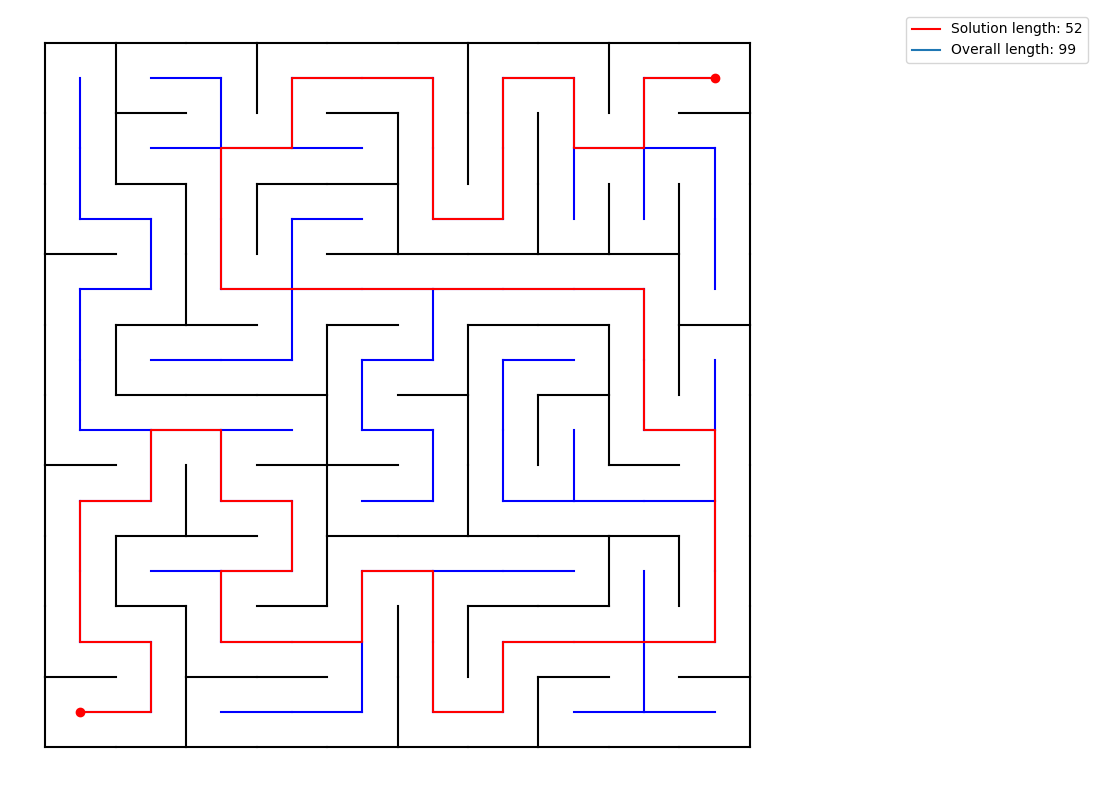

In [6]:
def gen_adj_tree(tree):
    global WIDTH, HEIGHT
    adj_tree = [[] for i in range(WIDTH * HEIGHT)]

    for edge in tree:
        adj_tree[edge[0]].append(edge[1])
        adj_tree[edge[1]].append(edge[0])
    
    return adj_tree

# now we can find a seed that will generate longest Path
LONGEST_PATH = []
LONGEST_PATH_LENGTH = 0
LONGEST_TREE = None
LONGEST_TREE_LAB = None
MAX_SEED_10x10 = 5846 # creates path of length 52
MAX_SEED_20x20 = 5114 # creates path of length 118
MAX_SEED_30x30 = 5114 # creates path of length 212

for seed in range(10000):
    random.seed(seed)

    curr_tree = gen_tree(gen_grid_graph())
    curr_adj_tree = gen_adj_tree(curr_tree)
    curr_path = bidirectional_BFS_search(curr_adj_tree)
    if len(curr_path) > LONGEST_PATH_LENGTH:
        LONGEST_PATH_LENGTH = len(curr_path)
        LONGEST_PATH = curr_path
        LONGEST_TREE = curr_tree
        SEED_10x10 = seed

print(SEED_10x10)
LONGEST_TREE_LAB = gen_labirynth(LONGEST_TREE)

plot_graph(LONGEST_TREE)
plot_labirynth(LONGEST_TREE_LAB)
plot_solution(LONGEST_TREE)
plot_show()